In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from GoogleNews import GoogleNews
from newspaper import Article
from newspaper import Config
from wordcloud import WordCloud, STOPWORDS
nltk.download('vader_lexicon') #required for Sentiment Analysis


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gamdh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [31]:
now = dt.date.today()
now = now.strftime('%m-%d-%Y')
yesterday = dt.date.today() - dt.timedelta(days = 1)
yesterday = yesterday.strftime('%m-%d-%Y')

nltk.download('punkt')
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:78.0) Gecko/20100101 Firefox/78.0'
config = Config()
config.browser_user_agent = user_agent
config.request_timeout = 100
company_name = 'NVIDIA'
#As long as the company name is valid, not empty...
if company_name != '':
    print(f'Searching for and analyzing {company_name}, Please be patient, it might take a while...')

    #Extract News with Google News
    googlenews = GoogleNews(start=yesterday,end=now)
    googlenews.search(company_name)
    result = googlenews.result()
    #store the results
    df = pd.DataFrame(result)
    print(df)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gamdh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Searching for and analyzing NVIDIA, Please be patient, it might take a while...
                                               title  \
0  JPMorgan is 'the Nvidia of banking,' top-ranke...   
1  Nvidia earnings could spark $200 billion swing...   
2  What You Need To Know Ahead of Nvidia's Earnin...   
3  Nvidia's rivals take aim at its software domin...   
4  Ubuntu 24.10 to Default to Wayland for NVIDIA ...   
5  NVDA Outlook: Will Nvidia Stock Crack $1000 Af...   
6  Dow Jones Futures Fall: AI Stock Palo Alto Plu...   
7        The Big Nvidia News Arrives Tomorrow (NVDA)   
8  US stock futures tread water; Nvidia anticipat...   
9  Bank of America Chimes in on Nvidia Stock Ahea...   

                       media           date                   datetime  \
0                    Fortune  7 minutes ago 2024-05-21 11:46:25.537860   
1              Yahoo Finance     1 hour ago 2024-05-21 10:53:25.543936   
2               Investopedia     1 hour ago 2024-05-21 10:53:25.549915   
3      

In [32]:
try:
    list =[] #creating an empty list 
    for i in df.index:
        dict = {} #creating an empty dictionary to append an article in every single iteration
        article = Article(df['link'][i],config=config) #providing the link
        try:
          article.download() #downloading the article 
          article.parse() #parsing the article
          article.nlp() #performing natural language processing (nlp)
        except:
           pass 
        #storing results in our empty dictionary
        dict['Date']=df['date'][i] 
        dict['Media']=df['media'][i]
        dict['Title']=article.title
        dict['Article']=article.text
        dict['Summary']=article.summary
        dict['Key_words']=article.keywords
        list.append(dict)
    check_empty = not any(list)
    # print(check_empty)
    if check_empty == False:
      news_df=pd.DataFrame(list) #creating dataframe
      print(news_df)

except Exception as e:
    #exception handling
    print("exception occurred:" + str(e))
    print('Looks like, there is some error in retrieving the data, Please try again or try with a different ticker.' )


            Date                      Media              Title  \
0  7 minutes ago                    Fortune                      
1     1 hour ago              Yahoo Finance                      
2     1 hour ago               Investopedia                      
3    2 hours ago            Financial Times  Subscribe to read   
4    3 hours ago                OMG! Ubuntu                      
5    3 hours ago              InvestorPlace                      
6    4 hours ago  Investor's Business Daily                      
7    6 hours ago              Seeking Alpha                      
8    6 hours ago              Investing.com                      
9    7 hours ago                   TipRanks                      

                                             Article  \
0                                                      
1                                                      
2                                                      
3  Try unlimited access Only ₹100 for 4 weeks\n\n

Positive Sentiment: 0.00
Neutral Sentiment: 9.00
Negative Sentiment: 1.00


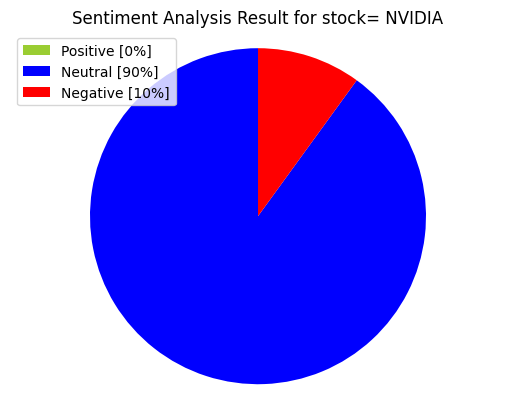

Wordcloud for NVIDIA


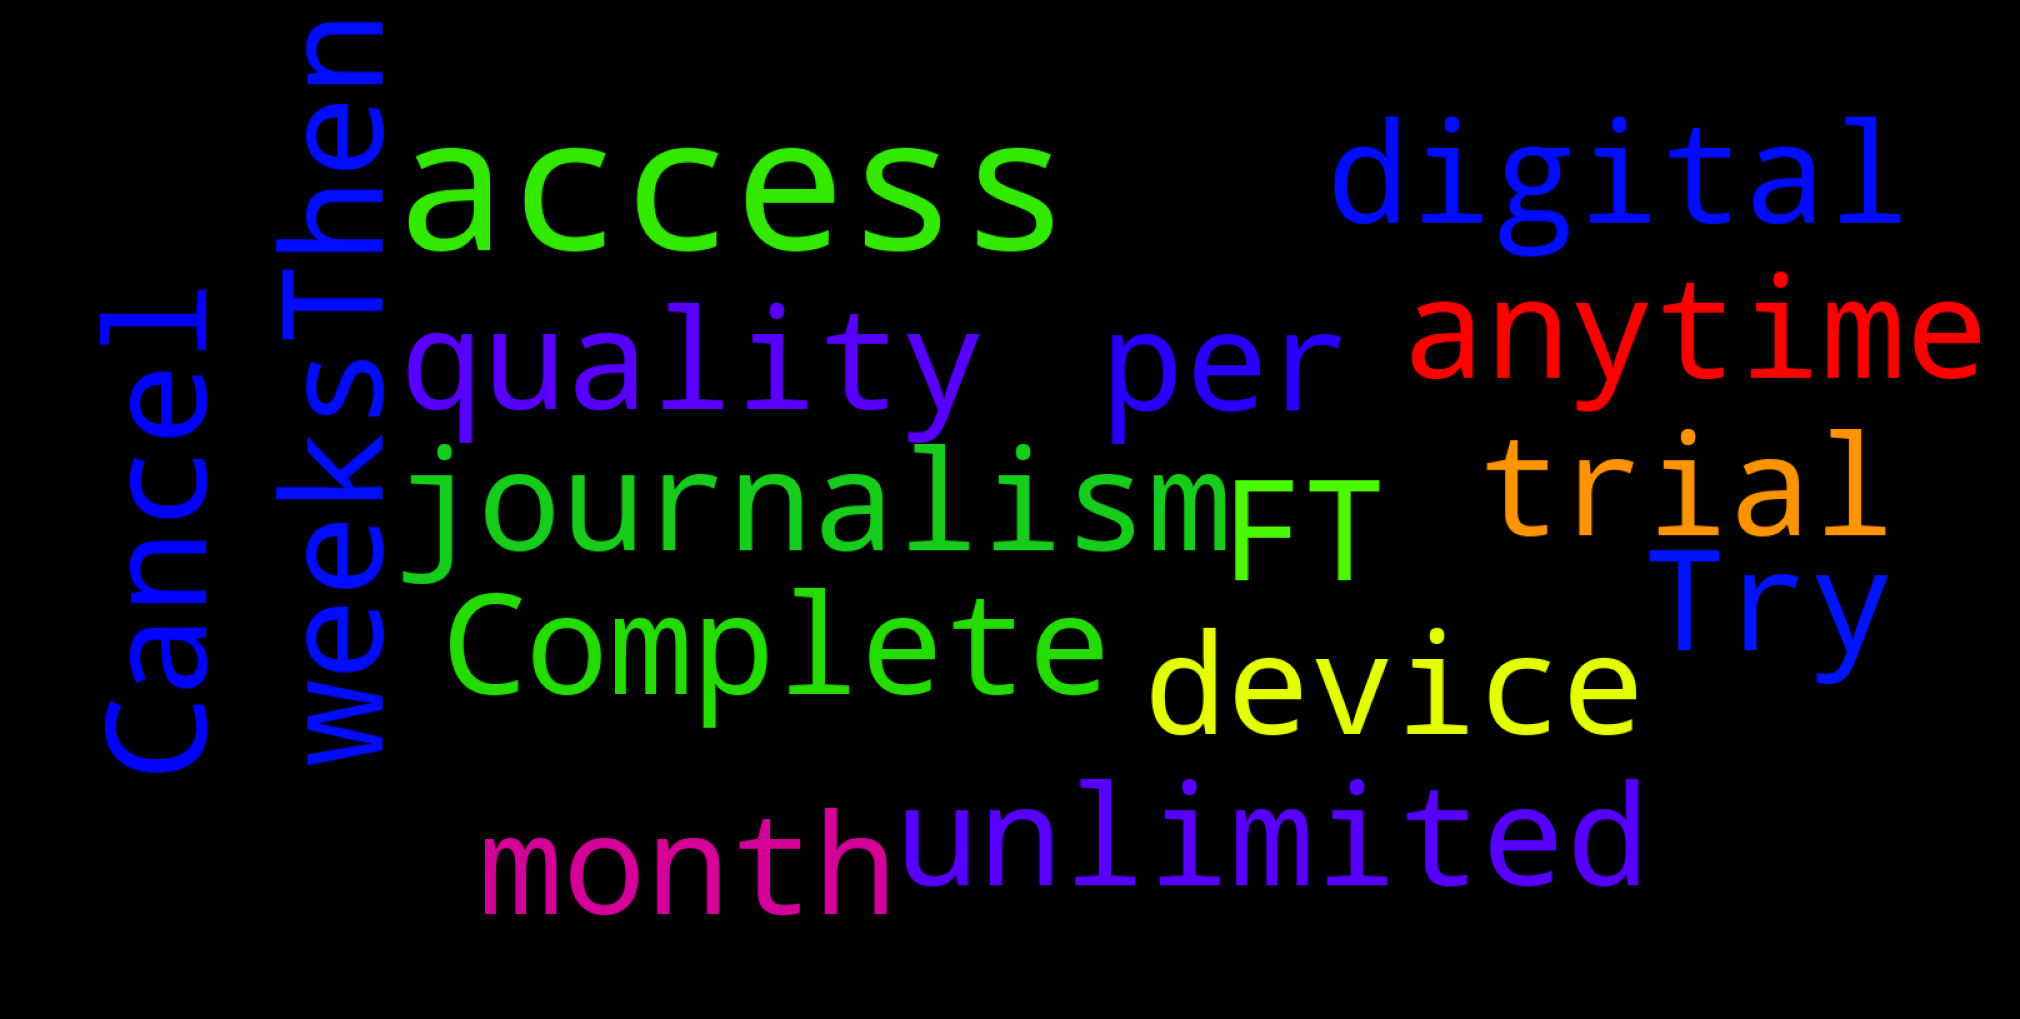

In [33]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole)

#Assigning Initial Values
positive = 0
negative = 0
neutral = 0
#Creating empty lists
news_list = []
neutral_list = []
negative_list = []
positive_list = []

#Iterating over the tweets in the dataframe
for news in news_df['Summary']:
    news_list.append(news)
    analyzer = SentimentIntensityAnalyzer().polarity_scores(news)
    neg = analyzer['neg']
    neu = analyzer['neu']
    pos = analyzer['pos']
    comp = analyzer['compound']

    if neg > pos:
        negative_list.append(news) #appending the news that satisfies this condition
        negative += 1 #increasing the count by 1
    elif pos > neg:
        positive_list.append(news) #appending the news that satisfies this condition
        positive += 1 #increasing the count by 1
    elif pos == neg:
        neutral_list.append(news) #appending the news that satisfies this condition
        neutral += 1 #increasing the count by 1 

positive = percentage(positive, len(news_df)) #percentage is the function defined above
negative = percentage(negative, len(news_df))
neutral = percentage(neutral, len(news_df))

#Converting lists to pandas dataframe
news_list = pd.DataFrame(news_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
#using len(length) function for counting
print("Positive Sentiment:", '%.2f' % len(positive_list), end='\n')
print("Neutral Sentiment:", '%.2f' % len(neutral_list), end='\n')
print("Negative Sentiment:", '%.2f' % len(negative_list), end='\n')

#Creating PieCart
labels = ['Positive ['+str(round(positive))+'%]' , 'Neutral ['+str(round(neutral))+'%]','Negative ['+str(round(negative))+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for stock= "+company_name+"" )
plt.axis('equal')
plt.show()

# Word cloud visualization
def word_cloud(text):
    stopwords = set(STOPWORDS)
    allWords = ' '.join([nws for nws in text])
    wordCloud = WordCloud(background_color='black',width = 1600, height = 800,stopwords = stopwords,min_font_size = 20,max_font_size=150,colormap='prism').generate(allWords)
    fig, ax = plt.subplots(figsize=(20,10), facecolor='k')
    plt.imshow(wordCloud)
    ax.axis("off")
    fig.tight_layout(pad=0)
    plt.show()

print('Wordcloud for ' + company_name)
word_cloud(news_df['Summary'].values)
